# LAB 07 TASK

### Name : Ammaar Naeem Laghari
### sec : BCS-6B
### roll no: P200180

## TASKS

1. Load the customer segmentation dataset.
2. Clean the data by removing any duplicates, and missing values.
3. Preprocess the data by scaling the features to ensure they are on the same scale. You
 can use standardization or normalization techniques for this step.
4. Select the relevant features that are most important in determining customer behavior.
5. Apply K-means clustering to the preprocessed and selected features to identify
customer segments with similar behavior and demographics. Choose the optimal
number of clusters using techniques like the elbow method.
6. Visualize the resulting clusters using techniques like scatter plots.

In [13]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# loading and reading data from csv file as data fram
info=pd.read_csv('Cust_Segmentation.csv')
info.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
# Cleaning the data by removing any duplicates
info.drop_duplicates()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [4]:
#checking the missing values and removing them
print(info.isnull().sum())
info.dropna(inplace=True)

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


In [5]:
# dropping the address column because it's a string
info=info.drop(['Address','Customer Id'], axis=1)


In [6]:
scaler = StandardScaler()
scaled_info = scaler.fit_transform(info.iloc[::])

In [7]:
#converting scaled data back to pandas
scaled_info=pd.DataFrame(scaled_info,columns=['Age','Edu','Years Employed','Income','Card Debt','other Debt','Defaulted','DebtIncomeRatio'])
print(scaled_info)

          Age       Edu  Years Employed    Income  Card Debt  other Debt  \
0    0.768304  0.298793       -0.359007 -0.723102  -0.675699   -0.604284   
1    1.519090 -0.779325        2.647029  1.478707   1.431421    1.570620   
2   -0.232744  0.298793        0.242201  0.309845   2.154119    0.835201   
3   -0.733267  0.298793       -0.659610 -0.723102  -0.412427   -0.773833   
4    1.519090 -0.779325        3.398538  5.637681   3.665215    1.780653   
..        ...       ...             ...       ...        ...         ...   
695  0.768304 -0.779325       -0.208705 -0.070714  -0.406283   -0.566235   
696 -0.858398  0.298793       -0.208705 -0.315360  -0.564624   -0.315718   
697 -1.233791  2.455029       -1.260817 -0.750285   0.590086    0.046209   
698 -0.357875 -0.779325        0.542804 -0.478457  -0.679481   -0.719041   
699  2.144745 -0.779325        1.144011  0.500125   0.147675    0.176490   

     Defaulted  DebtIncomeRatio  
0    -0.594950        -0.580528  
1    -0.594950     

In [8]:
new_scaled_info=pd.DataFrame(scaled_info,columns=['Age','Income'])

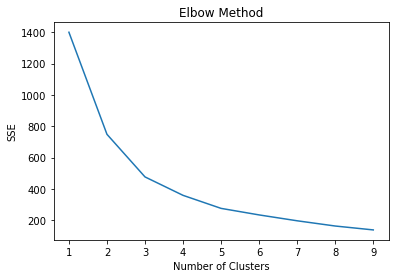

In [9]:
#Applying K-means clustering to the preprocessed and selected features
sse=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,max_iter=100,random_state=0)
    kmeans.fit(new_scaled_info)
    sse.append(kmeans.inertia_)
    
number_clusters = range(1,10)
plt.plot(number_clusters,sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [10]:
x = new_scaled_info
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=0)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=0)

In [11]:
x['Cluster']=kmeans.labels_
x['Cluster'].describe()

count    700.000000
mean       1.664286
std        1.107981
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Cluster, dtype: float64

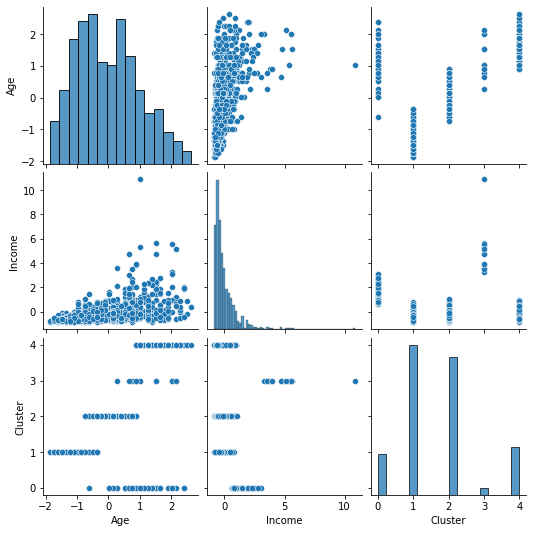

In [14]:
sns.pairplot(x)

C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anlag\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

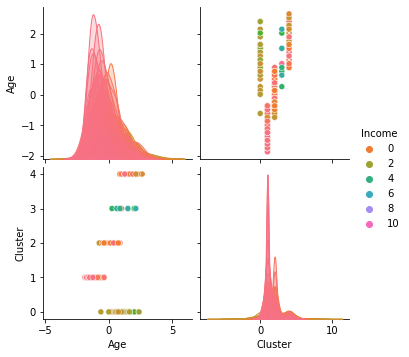

In [16]:
sns.pairplot(x,hue = 'Income',diag_kind = "kde",kind =
"scatter",palette = "husl")